In [103]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
from pylab import savefig
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

data_file = '/Users/m221138/RA_plasma_metabolites/data/6_met_data_profile_v2.csv'
data_df = pd.read_csv(data_file, header=0, index_col=0)
data_df = data_df.T
r, c = data_df.shape

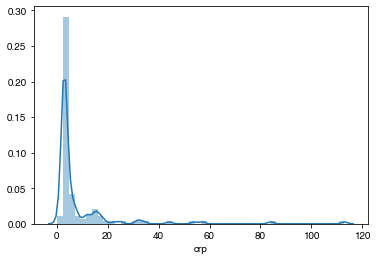

In [104]:
data_dict = {'mannose': 0.0000001896, 'serine': 0.0000628235237374638, 
             'N-acetylneuraminate': 0.000206964, '3-amino-2-piperidone': 0.006237357,
             'guanidinoacetate': 0.006979559, 'lysine':0.008755845}

sns.distplot(data_df["crp"])

mannose
mannose
ST-00010415_t1    0.7916
ST-00010415_t2    1.3987
ST-00010421_t1    0.5076
ST-00010421_t2    0.6989
ST-00011458_t1    0.6185
                   ...  
ST-00732959_t2    0.8153
ST-00739471_t1    0.9338
ST-00739471_t2    1.4282
ST-00745902_t1    1.8169
ST-00745902_t2    1.2278
Name: mannose, Length: 128, dtype: float64
0.43504212124530295 2.8730943833112167e-07
serine
serine
ST-00010415_t1    1.1681
ST-00010415_t2    0.8577
ST-00010421_t1    0.9172
ST-00010421_t2    0.9595
ST-00011458_t1    1.0674
                   ...  
ST-00732959_t2    0.9267
ST-00739471_t1    0.8695
ST-00739471_t2    1.0094
ST-00745902_t1    1.0481
ST-00745902_t2    1.2003
Name: serine, Length: 128, dtype: float64
-0.38090235956908164 9.184509522907194e-06
N-acetylneuraminate
N-acetylneuraminate
ST-00010415_t1    1.1305
ST-00010415_t2    1.0859
ST-00010421_t1    1.0699
ST-00010421_t2    0.7834
ST-00011458_t1    0.7319
                   ...  
ST-00732959_t2    0.9986
ST-00739471_t1    0.9804
ST-007394

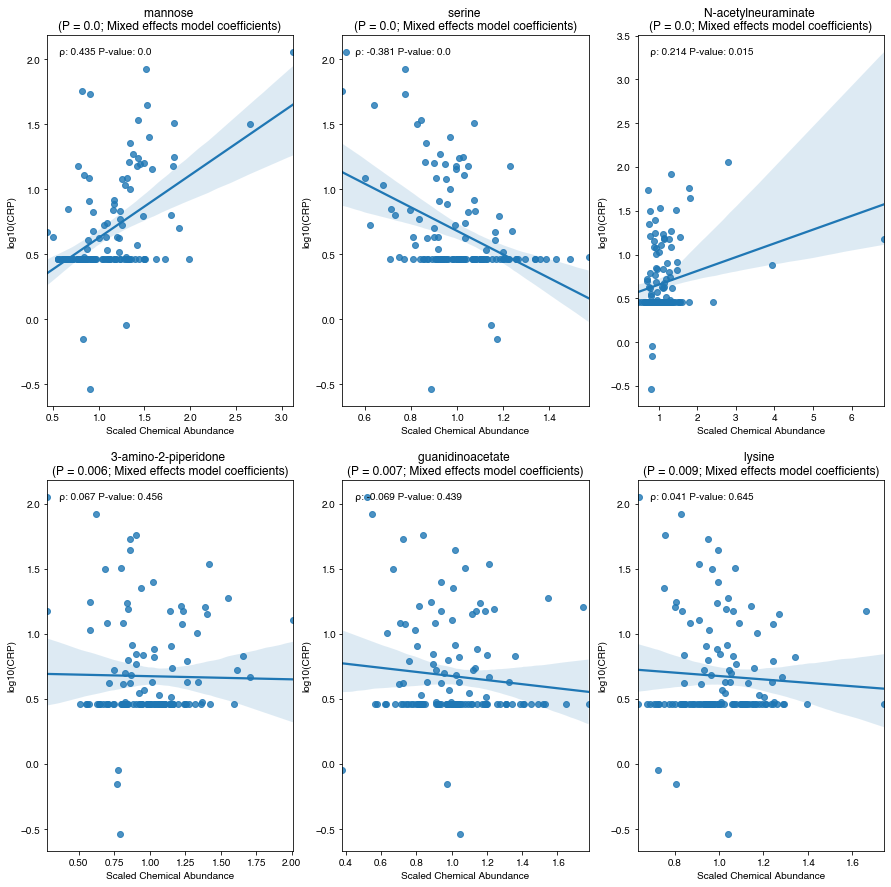

In [109]:
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 
output_pdf = '%s/6met_overall.log10.pdf' % '/Users/m221138/RA_plasma_metabolites/data/6met/'
chem_name_list = list(data_df.columns.values)

for chem_name in chem_name_list:
    print (chem_name)

    if chem_name != "crp" and chem_name != "das28" and chem_name != "log10_crp" and chem_name != "log2_crp":
        ax = axes_list.pop(0)
        crp_list = data_df["log10_crp"]
        chem_value_list = data_df[chem_name]
        print (chem_name)
        print (chem_value_list)

        corr, pvalue = spearmanr(chem_value_list, crp_list)
        print (corr, pvalue)

        sns.regplot(y="log10_crp", x=chem_name, ax=ax, data=data_df)
#         ax.scatter(x="crp", y=chem_name, z="das28", ax=ax, data = data_df)
        ax.set(ylabel="log10(CRP)", xlabel="Scaled Chemical Abundance")
        ax.set_title('%s \n(P = %s; Mixed effects model coefficients)' % (chem_name, round(data_dict[chem_name], 3)))
        spearman_txt = '\u03C1: %s P-value: %s' % (round(corr,3), round(pvalue,3))
        ax.text(0.05, 0.95, spearman_txt, transform=ax.transAxes)
        
# fig.tight_layout()

fig.get_figure()
fig.savefig(output_pdf)


mannose
mannose
ST-00010415_t1    0.7916
ST-00010415_t2    1.3987
ST-00010421_t1    0.5076
ST-00010421_t2    0.6989
ST-00011458_t1    0.6185
                   ...  
ST-00732959_t2    0.8153
ST-00739471_t1    0.9338
ST-00739471_t2    1.4282
ST-00745902_t1    1.8169
ST-00745902_t2    1.2278
Name: mannose, Length: 128, dtype: float64
0.43504212124530295 2.8730943833112167e-07
serine
serine
ST-00010415_t1    1.1681
ST-00010415_t2    0.8577
ST-00010421_t1    0.9172
ST-00010421_t2    0.9595
ST-00011458_t1    1.0674
                   ...  
ST-00732959_t2    0.9267
ST-00739471_t1    0.8695
ST-00739471_t2    1.0094
ST-00745902_t1    1.0481
ST-00745902_t2    1.2003
Name: serine, Length: 128, dtype: float64
-0.38090235956908164 9.184509522907194e-06
N-acetylneuraminate
N-acetylneuraminate
ST-00010415_t1    1.1305
ST-00010415_t2    1.0859
ST-00010421_t1    1.0699
ST-00010421_t2    0.7834
ST-00011458_t1    0.7319
                   ...  
ST-00732959_t2    0.9986
ST-00739471_t1    0.9804
ST-007394

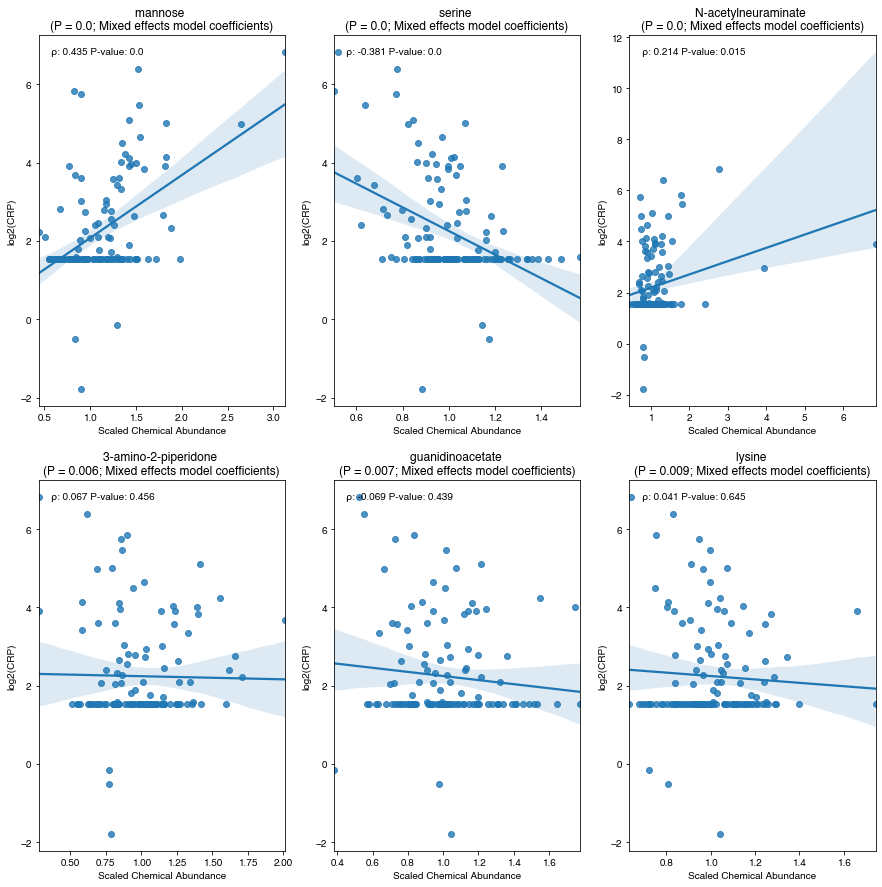

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 
output_pdf = '%s/6met_overall.log2.pdf' % '/Users/m221138/RA_plasma_metabolites/data/6met/'
chem_name_list = list(data_df.columns.values)

for chem_name in chem_name_list:
    print (chem_name)

    if chem_name != "crp" and chem_name != "das28" and chem_name != "log10_crp" and chem_name != "log2_crp":
        ax = axes_list.pop(0)
        crp_list = data_df["log2_crp"]
        chem_value_list = data_df[chem_name]
        print (chem_name)
        print (chem_value_list)

        corr, pvalue = spearmanr(chem_value_list, crp_list)
        print (corr, pvalue)

        sns.regplot(y="log2_crp", x=chem_name, ax=ax, data=data_df)
#         ax.scatter(x="crp", y=chem_name, z="das28", ax=ax, data = data_df)
        ax.set(ylabel="log2(CRP)", xlabel="Scaled Chemical Abundance")
        ax.set_title('%s \n(P = %s; Mixed effects model coefficients)' % (chem_name, round(data_dict[chem_name], 3)))
        spearman_txt = '\u03C1: %s P-value: %s' % (round(corr,3), round(pvalue,3))
        ax.text(0.05, 0.95, spearman_txt, transform=ax.transAxes)
        
# fig.tight_layout()

fig.get_figure()
fig.savefig(output_pdf)


mannose
ST-00010415_t1    0.7916
ST-00010415_t2    1.3987
ST-00010421_t1    0.5076
ST-00010421_t2    0.6989
ST-00011458_t1    0.6185
                   ...  
ST-00732959_t2    0.8153
ST-00739471_t1    0.9338
ST-00739471_t2    1.4282
ST-00745902_t1    1.8169
ST-00745902_t2    1.2278
Name: mannose, Length: 128, dtype: float64
serine
ST-00010415_t1    1.1681
ST-00010415_t2    0.8577
ST-00010421_t1    0.9172
ST-00010421_t2    0.9595
ST-00011458_t1    1.0674
                   ...  
ST-00732959_t2    0.9267
ST-00739471_t1    0.8695
ST-00739471_t2    1.0094
ST-00745902_t1    1.0481
ST-00745902_t2    1.2003
Name: serine, Length: 128, dtype: float64
N-acetylneuraminate
ST-00010415_t1    1.1305
ST-00010415_t2    1.0859
ST-00010421_t1    1.0699
ST-00010421_t2    0.7834
ST-00011458_t1    0.7319
                   ...  
ST-00732959_t2    0.9986
ST-00739471_t1    0.9804
ST-00739471_t2    1.0984
ST-00745902_t1    1.1275
ST-00745902_t2    1.1802
Name: N-acetylneuraminate, Length: 128, dtype: float64


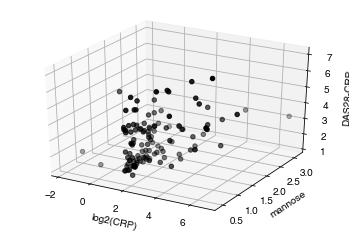

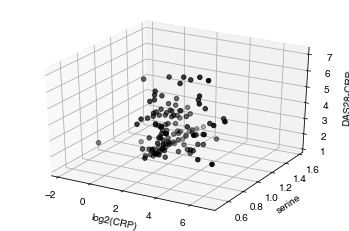

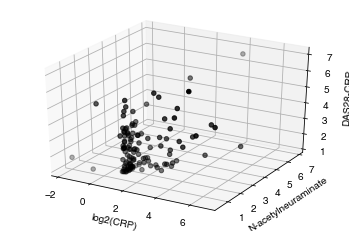

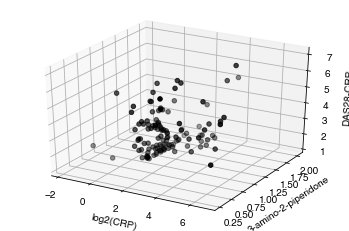

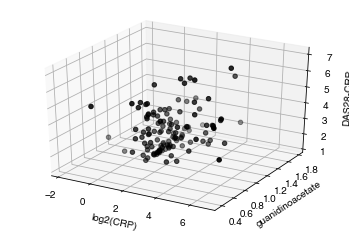

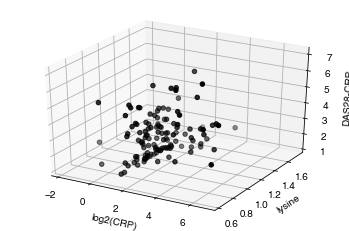

In [112]:
x = data_df["log2_crp"]
y = data_df["mannose"]
z = data_df["das28"]

for chemID in data_dict.keys():
    y = data_df[chemID]
    print (chemID)
    print (y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, c='black', marker='o')
    ax.set_xlabel('log2(CRP)')
    ax.set_ylabel(chemID)
    ax.set_zlabel('DAS28-CRP')
    
    fig.get_figure()
    fig.savefig("/Users/m221138/RA_plasma_metabolites/data/6met/%s_3D.log2.pdf" % chemID)
